In [4]:
%matplotlib inline
import pandas as pd
import requests
import gmaps
import os
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as stats

In [5]:
# File to Load (Remember to Change These)
file_to_load = r'covid_US.csv'

# Read Purchasing File and store into Pandas data frame
covid = pd.read_csv(file_to_load)

In [6]:
covid.head()

,Case_Type,People_Total_Tested_Count,Cases,Difference,Date,Combined_Key,Country_Region,Province_State,Admin2,iso2,iso3,FIPS,Lat,Long,Population_Count,People_Hospitalized_Cumulative_Count,Data_Source,Prep_Flow_Runtime
0,Deaths,NaN,0,0,4/19/2020,"Jackson, Kansas, US",US,Kansas,Jackson,US,USA,20085.0,39.416734,-95.793568,13171.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20
1,Confirmed,NaN,4,1,4/25/2020,"Sequatchie, Tennessee, US",US,Tennessee,Sequatchie,US,USA,47153.0,35.369797,-85.410221,15026.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20
2,Deaths,NaN,0,0,4/10/2020,"Wayne, Mississippi, US",US,Mississippi,Wayne,US,USA,28153.0,31.641357,-88.695739,20183.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20
3,Deaths,NaN,0,0,3/17/2020,"Carroll, Mississippi, US",US,Mississippi,Carroll,US,USA,28015.0,33.448346,-89.919945,9947.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20
4,Deaths,NaN,0,0,3/7/2020,"Bailey, Texas, US",US,Texas,Bailey,US,USA,48017.0,34.068548,-102.829971,7000.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20


In [7]:
covid.describe()

,People_Total_Tested_Count,Cases,Difference,FIPS,Lat,Long,Population_Count,People_Hospitalized_Cumulative_Count
count,1904.000000,638960.000000,638960.000000,616812.000000,618380.000000,618380.000000,6.183800e+05,1904.000000
mean,74374.897059,30.339225,1.675820,30335.484906,38.414583,-92.155938,1.076612e+05,2033.179622
std,107981.580595,880.360676,39.825282,15196.100657,5.437643,14.271217,3.661180e+05,7172.137270
min,3.000000,0.000000,-2028.000000,60.000000,-14.271000,-170.132000,8.600000e+01,0.000000
25%,16237.750000,0.000000,0.000000,18169.000000,34.688358,-98.313190,1.093900e+04,60.500000
50%,41156.500000,0.000000,0.000000,29171.000000,38.384828,-90.404212,2.603200e+04,445.500000
75%,82897.500000,0.000000,0.000000,45079.000000,41.792284,-83.430787,6.906900e+04,1581.000000
max,844994.000000,162338.000000,7837.000000,56045.000000,69.314792,145.673900,1.003911e+07,64275.000000


In [8]:
covid.Country_Region.unique()

array(['US'], dtype=object)

In [9]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638960 entries, 0 to 638959
Data columns (total 18 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Case_Type                             638960 non-null  object 
 1   People_Total_Tested_Count             1904 non-null    float64
 2   Cases                                 638960 non-null  int64  
 3   Difference                            638960 non-null  int64  
 4   Date                                  638960 non-null  object 
 5   Combined_Key                          638960 non-null  object 
 6   Country_Region                        638960 non-null  object 
 7   Province_State                        638960 non-null  object 
 8   Admin2                                637980 non-null  object 
 9   iso2                                  638764 non-null  object 
 10  iso3                                  638764 non-null  object 
 11  

In [10]:
# Sort data from earliest date to latest date
covid.sort_values("Date", axis = 0, ascending = True, 
                 inplace = True, na_position ='last') 
covid

,Case_Type,People_Total_Tested_Count,Cases,Difference,Date,Combined_Key,Country_Region,Province_State,Admin2,iso2,iso3,FIPS,Lat,Long,Population_Count,People_Hospitalized_Cumulative_Count,Data_Source,Prep_Flow_Runtime
638959,Confirmed,NaN,0,0,1/22/2020,"Hampton, South Carolina, US",US,South Carolina,Hampton,US,USA,45049.0,32.774196,-81.138456,19222.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20
579599,Confirmed,NaN,0,0,1/22/2020,"Unassigned, California, US",US,California,Unassigned,US,USA,NaN,NaN,NaN,NaN,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20
579600,Confirmed,NaN,0,0,1/22/2020,"Unassigned, Nevada, US",US,Nevada,Unassigned,US,USA,NaN,NaN,NaN,NaN,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20
579601,Confirmed,NaN,0,0,1/22/2020,"Pitkin, Colorado, US",US,Colorado,Pitkin,US,USA,8097.0,39.217201,-106.931003,17767.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20
579602,Confirmed,NaN,0,0,1/22/2020,"Cottle, Texas, US",US,Texas,Cottle,US,USA,48101.0,34.077833,-100.278506,1398.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53860,Deaths,NaN,0,0,4/9/2020,"Ouray, Colorado, US",US,Colorado,Ouray,US,USA,8091.0,38.147175,-107.767514,4952.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20
515596,Confirmed,NaN,6,1,4/9/2020,"Brantley, Georgia, US",US,Georgia,Brantley,US,USA,13025.0,31.195766,-81.977440,19109.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20
53825,Confirmed,NaN,3,0,4/9/2020,"Seward, Kansas, US",US,Kansas,Seward,US,USA,20175.0,37.193246,-100.850720,21428.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20
354487,Deaths,NaN,0,0,4/9/2020,"Roberts, South Dakota, US",US,South Dakota,Roberts,US,USA,46109.0,45.629750,-96.946727,10394.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20


In [11]:
covid.People_Total_Tested_Count

638959   NaN
579599   NaN
579600   NaN
579601   NaN
579602   NaN
          ..
53860    NaN
515596   NaN
53825    NaN
354487   NaN
293330   NaN
Name: People_Total_Tested_Count, Length: 638960, dtype: float64

In [12]:
# Find number of confirmed cases through mask
mask1 = covid["Country_Region"] == "US"
mask2 = covid["Case_Type"] == "Confirmed"
mask3 = covid["Date"] == "4/28/2020"
mask4 = mask1 & mask2 & mask3
mask5 = covid.loc[mask4]
mask5.head()


,Case_Type,People_Total_Tested_Count,Cases,Difference,Date,Combined_Key,Country_Region,Province_State,Admin2,iso2,iso3,FIPS,Lat,Long,Population_Count,People_Hospitalized_Cumulative_Count,Data_Source,Prep_Flow_Runtime
557628,Confirmed,NaN,10,0,4/28/2020,"Howard, Nebraska, US",US,Nebraska,Howard,US,USA,31093.0,41.220053,-98.516650,6445.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20
110682,Confirmed,NaN,118,4,4/28/2020,"Hillsdale, Michigan, US",US,Michigan,Hillsdale,US,USA,26059.0,41.887536,-84.593120,45605.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20
24678,Confirmed,NaN,11,0,4/28/2020,"Waynesboro, Virginia, US",US,Virginia,Waynesboro,US,USA,51820.0,38.064515,-78.902939,22630.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20
523695,Confirmed,NaN,21,0,4/28/2020,"Labette, Kansas, US",US,Kansas,Labette,US,USA,20099.0,37.191131,-95.298497,19618.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20
373636,Confirmed,NaN,22,0,4/28/2020,"Marshall, Tennessee, US",US,Tennessee,Marshall,US,USA,47117.0,35.457988,-86.764210,34375.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20


In [13]:
# FInd total cases by state through a groupby 
mask5.groupby("Province_State").sum()["Cases"]
total_cases = mask5.groupby("Province_State").sum()["Cases"]
total_cases

Province_State
Alabama                       6750
Alaska                         351
American Samoa                   0
Arizona                       6955
Arkansas                      3127
California                   46164
Colorado                     14316
Connecticut                  26312
Delaware                      4575
District of Columbia          3994
Florida                      32848
Georgia                      24922
Guam                           141
Hawaii                         609
Idaho                         1952
Illinois                     48102
Indiana                      16588
Iowa                          6376
Kansas                        3652
Kentucky                      4375
Louisiana                    27286
Maine                         1040
Maryland                     20113
Massachusetts                58302
Michigan                     39262
Minnesota                     4181
Mississippi                   6342
Missouri                      7450
Monta

In [14]:
# Total Population of each state 

total_population = mask5.groupby("Province_State").sum()["Population_Count"]

total_population

Province_State
Alabama                      4903185.0
Alaska                        731545.0
American Samoa                 55641.0
Arizona                      7278717.0
Arkansas                     3017804.0
California                  39512223.0
Colorado                     5758736.0
Connecticut                  3565287.0
Delaware                      973764.0
District of Columbia          705749.0
Florida                     21477737.0
Georgia                     10617423.0
Guam                          164229.0
Hawaii                       1415872.0
Idaho                        1787065.0
Illinois                    12671821.0
Indiana                      6732219.0
Iowa                         3155070.0
Kansas                       2913314.0
Kentucky                     4467673.0
Louisiana                    4648794.0
Maine                        1344212.0
Maryland                     6045680.0
Massachusetts                6921234.0
Michigan                     9986857.0
Minnesota 

In [15]:
# Find infection rate for each state and define 

infection_rate = total_cases / total_population *100

In [16]:
df_infection = infection_rate.round(2)
df_infection

Province_State
Alabama                     0.14
Alaska                      0.05
American Samoa              0.00
Arizona                     0.10
Arkansas                    0.10
California                  0.12
Colorado                    0.25
Connecticut                 0.74
Delaware                    0.47
District of Columbia        0.57
Florida                     0.15
Georgia                     0.23
Guam                        0.09
Hawaii                      0.04
Idaho                       0.11
Illinois                    0.38
Indiana                     0.25
Iowa                        0.20
Kansas                      0.13
Kentucky                    0.10
Louisiana                   0.59
Maine                       0.08
Maryland                    0.33
Massachusetts               0.84
Michigan                    0.39
Minnesota                   0.07
Mississippi                 0.21
Missouri                    0.11
Montana                     0.04
Nebraska                    

In [17]:
# Pull state names and put in a variable 
state = covid["Province_State"][4]
state

'Texas'

In [18]:
stats.ttest_ind(total_population, infection_rate, equal_var=False)

Ttest_indResult(statistic=6.056687525503289, pvalue=1.3028329193380332e-07)

In [19]:
# Plot a bar chart with Infection Rate and Population in each state 
def makemask(state):
    mask1 = covid['Province_State']== f"{state}"
    mask2 = covid['Case_Type']=='Confirmed'
    mask3 = mask1 & mask2
    state_df =  covid.loc[mask3].groupby(['Province_State']).sum()['Cases'].sort_values(ascending = True)
    infected_df = df_infection
    population = total_population
    plt.figure(figsize=(10,10))
    plt.rcParams.update({'font.size': 14})
    plt.xlabel("Infection Rate")
    inf_scatter = plt.scatter(infected_df, population, color='red', alpha=0.8, s=infected_df)
    plt.title(f"{state}")
    plt.xticks(rotation = 90)
   
    plt.show()

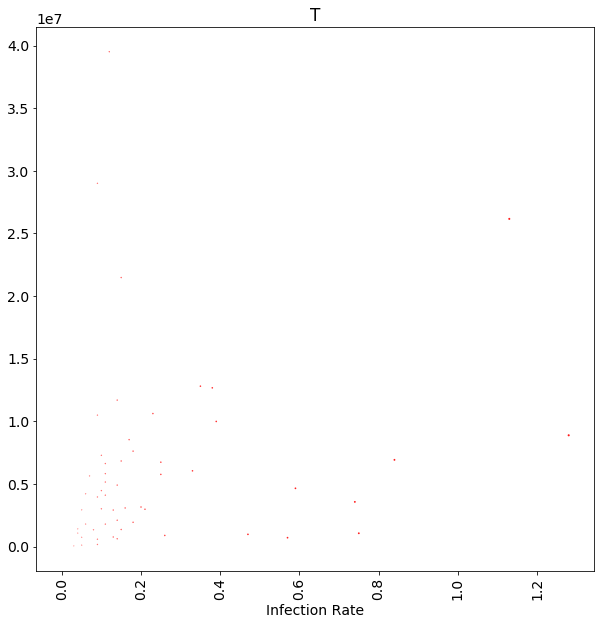

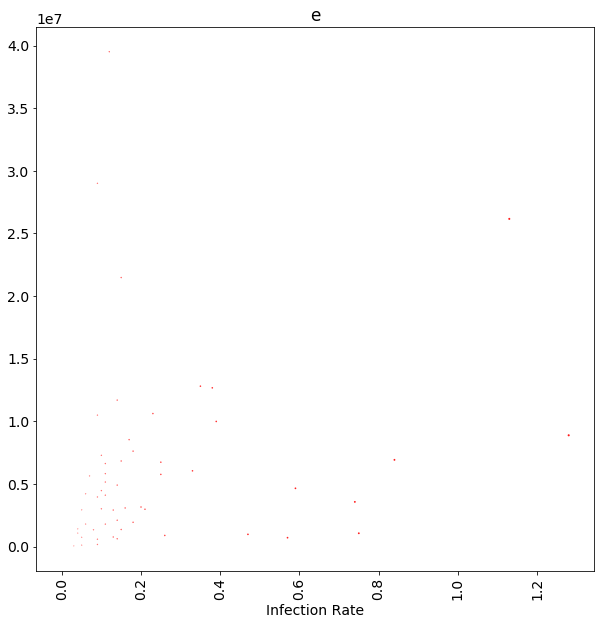

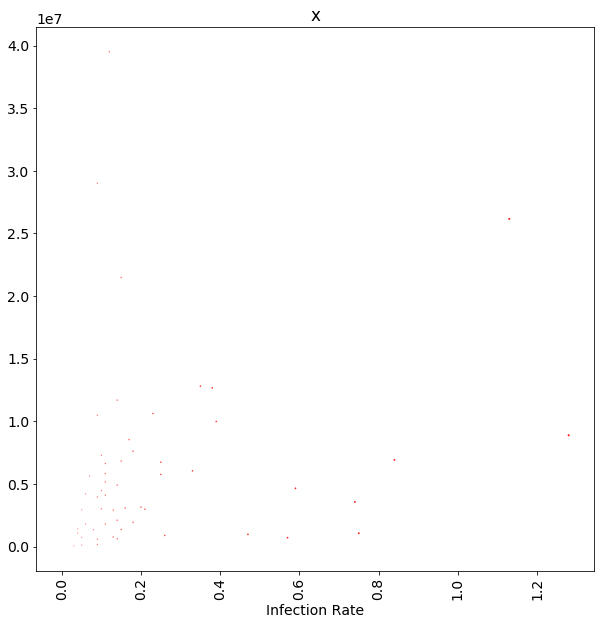

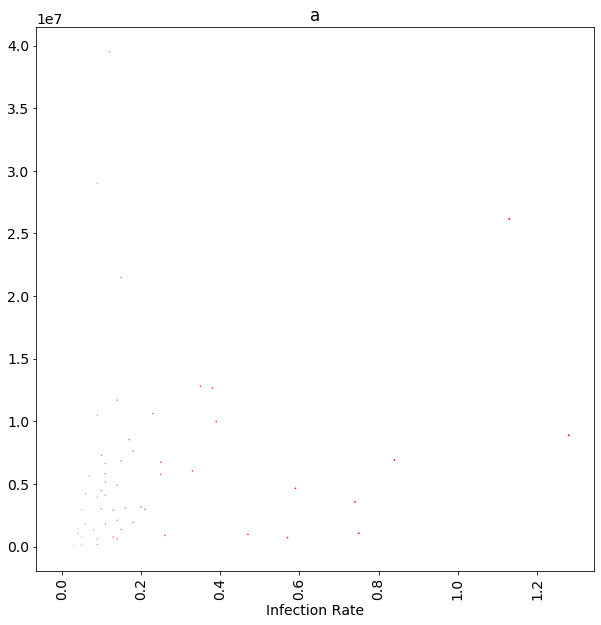

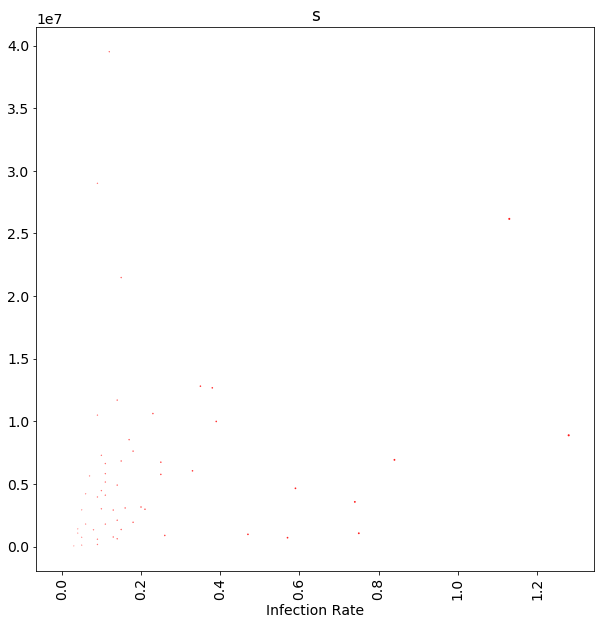

In [20]:
for state in state:
    makemask(state)

In [22]:
# Make mask to filter Texas counties 

tx_mask0 = covid["Province_State"] == "Texas"
tx_mask1 = covid["Admin2"] 
tx_mask2 = covid["Case_Type"] == "Confirmed"
tx_mask3 = covid["Date"] == "4/28/2020"
tx_mask4 = tx_mask0 & tx_mask1 & tx_mask2 & tx_mask3
tx_mask5 = covid.loc[tx_mask4]
tx_mask5


,Case_Type,People_Total_Tested_Count,Cases,Difference,Date,Combined_Key,Country_Region,Province_State,Admin2,iso2,iso3,FIPS,Lat,Long,Population_Count,People_Hospitalized_Cumulative_Count,Data_Source,Prep_Flow_Runtime
248248,Confirmed,NaN,14,1,4/28/2020,"Van Zandt, Texas, US",US,Texas,Van Zandt,US,USA,48467.0,32.564838,-95.837665,56590.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20
378666,Confirmed,NaN,5,0,4/28/2020,"Wheeler, Texas, US",US,Texas,Wheeler,US,USA,48483.0,35.401143,-100.269951,5056.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20
3770,Confirmed,NaN,829,27,4/28/2020,"El Paso, Texas, US",US,Texas,El Paso,US,USA,48141.0,31.769808,-106.236327,839238.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20
239265,Confirmed,NaN,83,-3,4/28/2020,"Harrison, Texas, US",US,Texas,Harrison,US,USA,48203.0,32.549360,-94.369341,66553.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20
458824,Confirmed,NaN,1,0,4/28/2020,"Sabine, Texas, US",US,Texas,Sabine,US,USA,48403.0,31.343188,-93.854405,10542.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450907,Confirmed,NaN,1,0,4/28/2020,"Dimmit, Texas, US",US,Texas,Dimmit,US,USA,48127.0,28.422701,-99.756451,10124.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20
588177,Confirmed,NaN,16,0,4/28/2020,"Maverick, Texas, US",US,Texas,Maverick,US,USA,48323.0,28.742919,-100.315769,58722.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20
337041,Confirmed,NaN,1464,52,4/28/2020,"Travis, Texas, US",US,Texas,Travis,US,USA,48453.0,30.334320,-97.785356,1273954.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20
574349,Confirmed,NaN,1,0,4/28/2020,"Delta, Texas, US",US,Texas,Delta,US,USA,48119.0,33.385709,-95.669211,5331.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20


In [55]:
county = tx_mask5["Admin2"]
county = county.sort_values(ascending=True)
county

359877    Anderson
136242     Andrews
365466    Angelina
112888     Aransas
65616       Archer
            ...   
510593        Wood
410123      Yoakum
355285       Young
601626      Zapata
568566      Zavala
Name: Admin2, Length: 256, dtype: object

In [50]:
#Population of each county in Texas
tx_population = tx_mask5.groupby("Admin2").sum()["Population_Count"]
tx_population = tx_population.sort_values(ascending=True)
tx_population

Admin2
Out of TX           0.0
Unassigned          0.0
Loving            169.0
King              272.0
Kenedy            404.0
                ...    
Travis        1273954.0
Bexar         2003554.0
Tarrant       2102515.0
Dallas        2635516.0
Harris        4713325.0
Name: Population_Count, Length: 256, dtype: float64

In [52]:
# Cases by counties in Texas 
tx_mask5.groupby("Admin2").sum()["Cases"]
tx_cases = tx_mask5.groupby("Admin2").sum()["Cases"]
tx_cases = tx_cases.sort_values(ascending=True)
tx_cases

Admin2
Hall            0
Culberson       0
Kent            0
Kimble          0
King            0
             ... 
Bexar        1275
Travis       1464
Tarrant      2019
Dallas       3240
Harris       5827
Name: Cases, Length: 256, dtype: int64

In [59]:
# Infected rate in each county in Texas
tx_infected = tx_cases
tx_infected =

14

In [27]:
# Make mask to filter New York counties

ny_mask0 = covid["Province_State"] == "New York"
ny_mask1 = covid["Admin2"] 
ny_mask2 = covid["Case_Type"] == "Confirmed"
ny_mask3 = covid["Date"] == "4/28/2020"
ny_mask4 = ny_mask0 & ny_mask1 & ny_mask2 & ny_mask3
ny_mask5 = covid.loc[ny_mask4]
ny_mask5

,Case_Type,People_Total_Tested_Count,Cases,Difference,Date,Combined_Key,Country_Region,Province_State,Admin2,iso2,iso3,FIPS,Lat,Long,Population_Count,People_Hospitalized_Cumulative_Count,Data_Source,Prep_Flow_Runtime
141427,Confirmed,NaN,162338,1849,4/28/2020,"New York, New York, US",US,New York,New York,US,USA,36061.0,40.767273,-73.971526,8336817.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20
592194,Confirmed,NaN,126,2,4/28/2020,"Madison, New York, US",US,New York,Madison,US,USA,36053.0,42.916539,-75.672666,70941.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20
243539,Confirmed,NaN,113,5,4/28/2020,"Chemung, New York, US",US,New York,Chemung,US,USA,36015.0,42.138911,-76.763880,83456.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20
341211,Confirmed,NaN,149,1,4/28/2020,"Genesee, New York, US",US,New York,Genesee,US,USA,36037.0,43.002260,-78.191352,57280.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20
241501,Confirmed,NaN,8374,136,4/28/2020,"Orange, New York, US",US,New York,Orange,US,USA,36071.0,41.403375,-74.302408,384940.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174851,Confirmed,NaN,58,0,4/28/2020,"Herkimer, New York, US",US,New York,Herkimer,US,USA,36043.0,43.420342,-74.961453,61319.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20
178680,Confirmed,NaN,386,8,4/28/2020,"Niagara, New York, US",US,New York,Niagara,US,USA,36063.0,43.198980,-78.747774,209281.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20
149663,Confirmed,NaN,0,0,4/28/2020,"Richmond, New York, US",US,New York,Richmond,US,USA,36085.0,40.585822,-74.148086,476143.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20
452318,Confirmed,NaN,82,11,4/28/2020,"Tioga, New York, US",US,New York,Tioga,US,USA,36107.0,42.168528,-76.308358,48203.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 23:20


In [62]:
# Population of each county in NY
ny_population = ny_mask5.groupby("Admin2").sum()["Population_Count"]
ny_population = ny_population.sort_values(ascending=True)
ny_population

Admin2
Unassigned          0.0
Out of NY           0.0
Hamilton         4416.0
Schuyler        17807.0
Yates           24913.0
                ...    
Bronx         1418207.0
Suffolk       1476601.0
Queens        2253858.0
Kings         2559903.0
New York      8336817.0
Name: Population_Count, Length: 64, dtype: float64

In [63]:
# Cases of each county in NY
ny_mask5.groupby("Admin2").sum()["Cases"]
ny_cases = ny_mask5.groupby("Admin2").sum()["Cases"]
ny_cases = ny_cases.sort_values(ascending=True)
ny_cases

Admin2
Kings               0
Bronx               0
Richmond            0
Queens              0
Out of NY           0
                ...  
Rockland        11453
Westchester     28245
Suffolk         32724
Nassau          35085
New York       162338
Name: Cases, Length: 64, dtype: int64

In [64]:


# Infected rate by county in NY
ny_infected = ny_cases 

ny_infected = ny_infected.sort_values(ascending=True)
ny_infected

Admin2
Kings               0
Bronx               0
Richmond            0
Queens              0
Out of NY           0
                ...  
Rockland        11453
Westchester     28245
Suffolk         32724
Nassau          35085
New York       162338
Name: Cases, Length: 64, dtype: int64

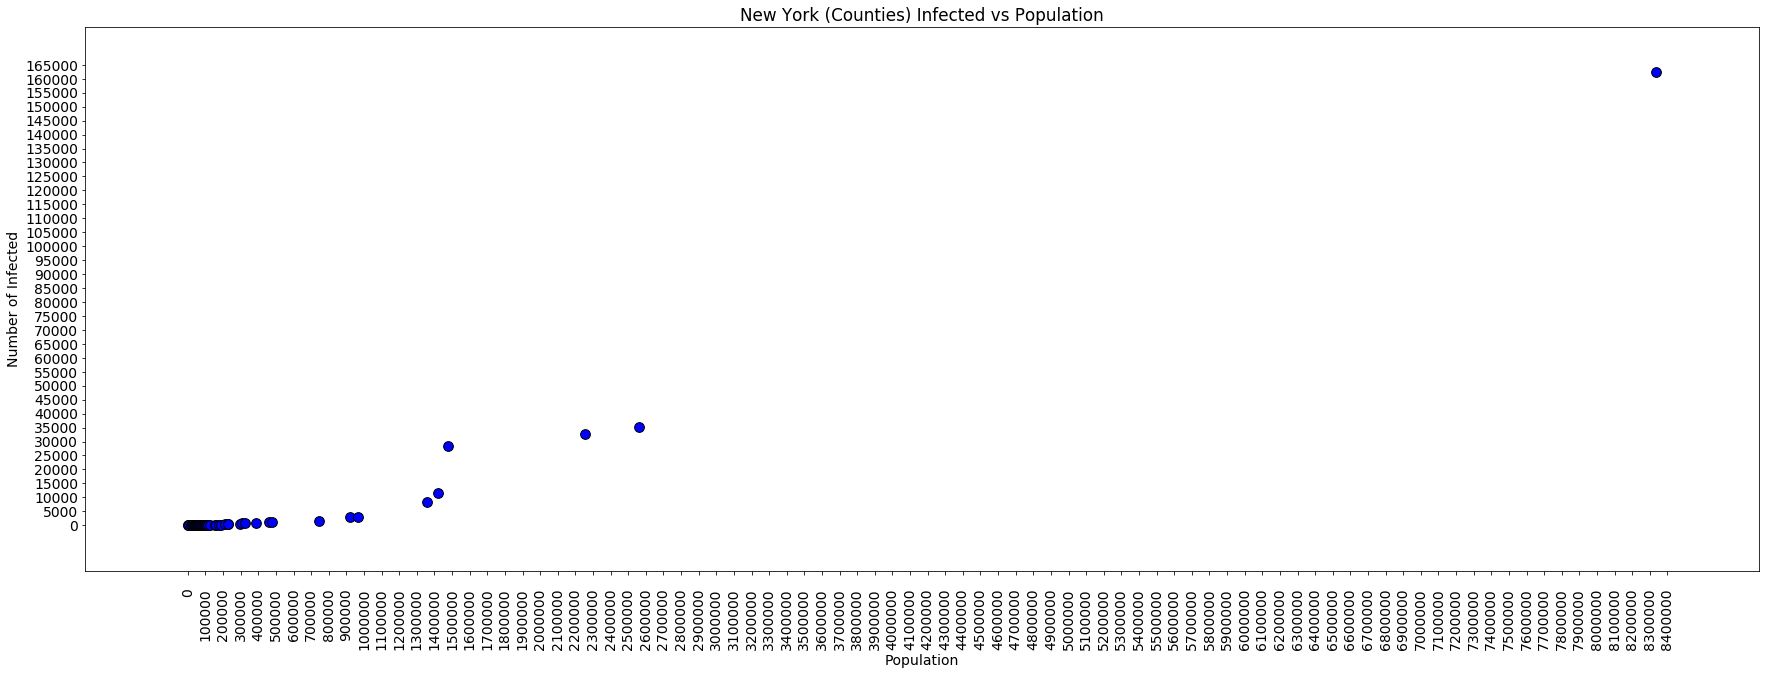

In [78]:
# Infected count vs Population in each county in New York
plt.figure(figsize=(30,10))
plt.rcParams['xtick.major.pad']='14'

plt.scatter(ny_population, ny_infected, color="b", edgecolors="black", s=95)
plt.margins(0.07,0.1)
plt.title("New York (Counties) Infected vs Population")
plt.xlabel("Population")
plt.ylabel("Number of Infected")
plt.rcParams.update({'font.size': 14})
y_ticks = np.arange(0,170000,5000)
x_ticks = np.arange(0,8500000,100000)
plt.yticks(y_ticks)
plt.xticks(x_ticks, rotation="vertical" )
plt.savefig('New York.png')
plt.show()

C:\Users\Chris\anaconda_alt\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


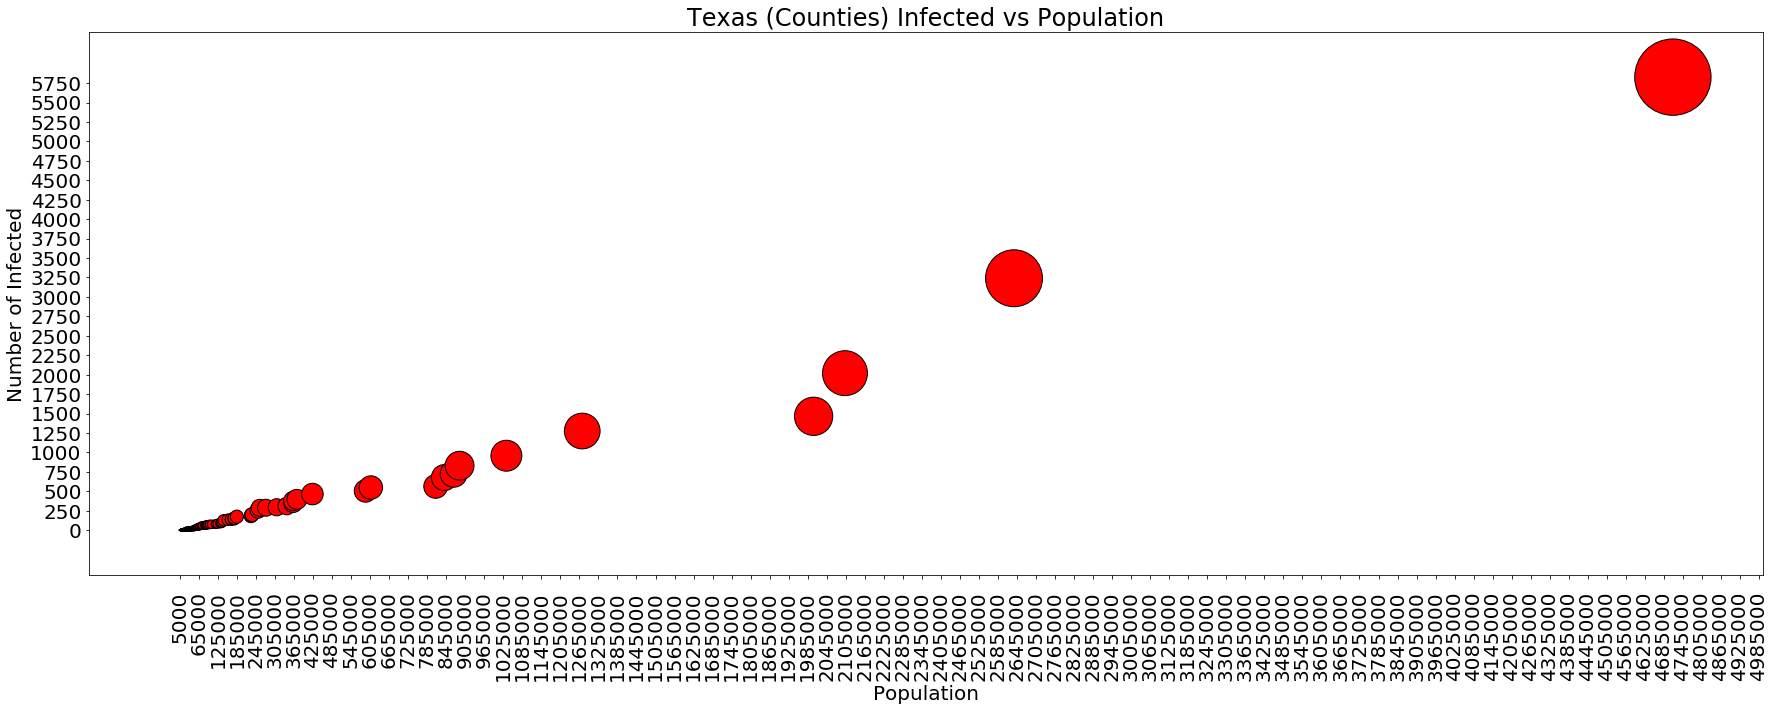

In [76]:
# Infected count vs Population in each Texas County
plt.figure(figsize=(30,10))
colors = 'r'
sc = plt.scatter(tx_population, tx_infected,  alpha=1.0, s=tx_infected, edgecolor="black", c=colors, )

plt.margins(0.06,0.1)
plt.title("Texas (Counties) Infected vs Population")
plt.xlabel("Population")
plt.ylabel("Number of Infected")
plt.rcParams.update({'font.size': 20})
y_ticks = np.arange(0,6000,250)
x_ticks = np.arange(5000,5000000,60000)
plt.yticks(y_ticks)
plt.xticks(x_ticks, rotation="vertical")

plt.show()


In [81]:
df = pd.DataFrame({'County': county, 'Population' : tx_population, 'Cases': tx_cases})


df

,County,Population,Cases
495,Milam,NaN,NaN
3282,Karnes,NaN,NaN
3770,El Paso,NaN,NaN
6045,Denton,NaN,NaN
8451,Lynn,NaN,NaN
...,...,...,...
Wood,NaN,45539.0,7.0
Yoakum,NaN,8713.0,1.0
Young,NaN,18010.0,4.0
Zapata,NaN,14179.0,7.0


In [83]:
stats.ttest_ind(tx_population, tx_infected, equal_var=False)

Ttest_indResult(statistic=4.443418041813024, pvalue=1.3210399000455797e-05)

In [ ]:
# The pvalue is below 0.05,
#which shows a very strong correlation with the population of each county and the number of people that are infected.

In [84]:
tx_cases['Jefferson']

288

In [85]:
tx_cases["Harris"]

5827